# Логистическая регрессия с помощью TensorFlow

## Содержание

1. Бинарная классификация с двумя параметрами на iris.csv  
2. Бинарная классификация с четырьмя параметрами на iris.csv

## 1. Бинарная классификация с двумя параметрами на iris.csv 

### Предобработка данных

In [133]:
import numpy as np
import pandas as pd
import os # для обработки пути к данным как на Unix-системах, так и на WIndows

In [116]:
DATA_DIR = "data"

In [117]:
df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')) # прочитать данные из CSV и указать колонку индексов
df_iris = df_iris.iloc[:100] # взять только два вида ирисов для бинарной классификации
df_iris = df_iris.sample(frac=1) # перемешать данные
df_iris = df_iris.reset_index(drop=True) # сбросить индексы для красоты

# можно было записать одной строкой
# df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv'), index_col=0).iloc[:100].sample(frac=1).reset_index(drop=True)

df_iris['species'] = df_iris['species'].astype('category').cat.codes # заменить setosa и versicolor на 0 и 1
df_iris.head() # вывести первые 5 рядов

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.1,1.5,0.1,0
1,6.5,2.8,4.6,1.5,1
2,5.0,3.2,1.2,0.2,0
3,5.7,3.8,1.7,0.3,0
4,5.6,2.9,3.6,1.3,1


In [118]:
# тренировочный датасет
X_train = df_iris[['sepal_length', 'sepal_width']][:67].values # два параметра - sepal length и sepal width
y_train = df_iris['species'][:67]

# тестовый датасет
X_test = df_iris[['sepal_length', 'sepal_width']][67:].values # два параметра - sepal length и sepal width
y_test = df_iris['species'][67:]

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (67, 2)
y_train.shape: (67,)
X_test.shape: (33, 2)
y_test.shape: (33,)


### Визуализация данных

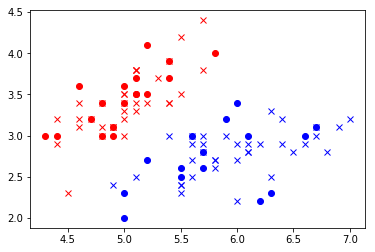

In [119]:
plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 'rx', label='Train')
plt.plot(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], 'ro', label='Test')

plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 'bx')
plt.plot(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 'bo')

### Построение модели

In [20]:
########################################## TODO ########################################################

### Оценка модели

In [20]:
########################################## TODO ########################################################

### Визуализация работы модели

In [123]:
import matplotlib.pyplot as plt

In [124]:
h = 0.01
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

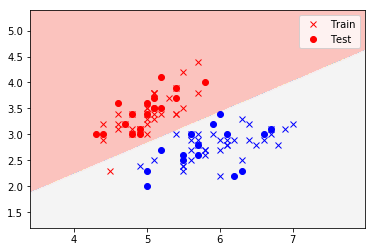

In [125]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 'rx', label='Train')
plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 'bx')
plt.plot(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], 'ro', label='Test')
plt.plot(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 'bo')
plt.legend()
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

## 2. Бинарная классификация с четырьмя параметрами на iris.csv 

### Предобработка данных

In [126]:
import numpy as np
import pandas as pd
import os

In [127]:
DATA_DIR = "data"

In [128]:
df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv'), index_col=0) # прочитать данные из CSV и указать колонку индексов
df_iris = df_iris.iloc[:100] # взять только два вида ирисов для бинарной классификации
df_iris = df_iris.sample(frac=1) # перемешать данные
df_iris = df_iris.reset_index(drop=True) # сбросить индексы для красоты

# можно было записать одной строкой
# df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv'), index_col=0).iloc[:100].sample(frac=1).reset_index(drop=True)

df_iris['species'] = df_iris['species'].astype('category').cat.codes # заменить setosa и versicolor на 0 и 1
df_iris.head() # вывести первые 5 рядов

,sepal_width,petal_length,petal_width,species
0,2.5,3.0,1.1,1
1,2.6,4.4,1.2,1
2,3.0,4.4,1.4,1
3,3.1,1.5,0.1,0
4,2.9,4.3,1.3,1


In [129]:
# тренировочный датасет
X_train = df_iris.drop(['species'], axis=1).iloc[:67].values # четыре параметра
y_train = df_iris['species'][:67]

# тестовый датасет
X_test = df_iris.drop(['species'], axis=1).iloc[67:].values # четыре параметра
y_test = df_iris['species'][67:]

print("X_train.shape: {}".format(X_train.shape))
print("Y_train.shape: {}".format(Y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("Y_test.shape: {}".format(Y_test.shape))

X_train.shape: (67, 3)
Y_train.shape: (67,)
X_test.shape: (33, 3)
Y_test.shape: (33,)


### Построение модели

In [20]:
########################################## TODO ########################################################

### Оценка модели

In [20]:
########################################## TODO ########################################################